# Challenge
The idea behind this challenge is for you to explore the dataset, build a prediction model from it and then code a Python module that serves the model. Therefore there will be two main parts:

1. Your Jupyter (IPython) notebook containing all your experiments, analyzes, and results. In this notebook, you will perform all your visualizations, data normalizations, training and evaluation of your model.
2. A complete Python module ready to be used containing the model you trained. This module should be coded as if the engineering team would use it so it must contain usage instructions and a clear interface (generally speaking) to access your model.

## The dataset
Kickstarter is one of the main online crowdfunding platforms in the world. The dataset provided contains more de 300,000 projects launched on the platform in 2018. In the `data.csv` file there are the following columns:

- **ID**: internal ID, _numeric_
- **name**: name of the project, _string_
- **category**: project's category, _string_
- **main_category**: campaign's category, _string_
- **currency**: project's currency, _string_
- **deadline**: project's deadline date, _timestamp_
- **goal**: fundraising goal, _numeric_
- **launched**: project's start date, _timestamp_
- **pledged**: amount pledged by backers (project's currency), _numeric_
- **state**: project's current state, _string_; **this is what you have to predict**
- **backers**: amount of poeple that backed the project, _numeric_
- **country**: project's country, _string_
- **usd pledged**: amount pledged by backers converted to USD (conversion made by KS), _numeric_
- **usd_pledged_real**: amount pledged by backers converted to USD (conversion made by fixer.io api), _numeric_
- **usd_goal_real**: fundraising goal is USD, _numeric_

## Goal
Your goal is to predict whether a project will be successful or not. It is entirely up to you which features you will use and which model. When it comes to performance metrics you should be able to say when the model is good enough. There are no minimum requirements or tricky conditions. What we are trying to evaluate is how you handle an unknown dataset in a classification task and your ability to deliver the results.

## Deliverables
Do not use this notebook for your submission. The expected outputs are:

1. A Jupyter (IPython) notebook (that you have to create) containing your work and explanations. This is where you will put all your experiments, notes, visualizations and transformations in the data. This is also where you will prepare your data and train your prediction model.
2. A Python module containing your model and functions to use to predict Kickstarter projects' state. Assume that in order to review your work an engineer will import this module and try to make some predictions so your model should be in it.
3. A Markdown file containing usage instructions for your Python module. 

In [55]:
# For data manipulation
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.feature_selection import VarianceThreshold


# To plot
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('whitegrid')

# machine learning classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# For evaluating our ML results
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn import metrics



# Dataset Import
import statsmodels.api as sm


# Import data

In [2]:
project = pd.read_csv('data.csv')
project.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
project.drop(['ID'], axis=1)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


# Exploroty Data Analysis

In [4]:
project.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
# Groupby Had Affair column
project.groupby('state').mean()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,
canceled,1.076086e+09,86193.059649,2645.752488,25.987390,1875.463782,2340.521661,75579.415376
failed,1.074639e+09,67346.845539,1426.971450,16.422352,1133.741030,1320.603817,63174.742222
live,1.084275e+09,76762.393355,9085.240497,68.099678,1254.124725,5869.166852,62535.280915
successful,1.073727e+09,10162.960544,24099.779097,263.921362,17356.034449,22670.795231,9532.853357
suspended,1.094302e+09,181370.796858,10816.813987,105.082340,7838.542478,9312.382952,175208.010265
undefined,1.085224e+09,4405.393599,2279.674416,0.000000,NaN,2212.855236,4103.022038


looking at the mean of project data, seem like in goal, project is successful is lower than projest is not successful which is make senes same as usd_goal_real. However,high pledged project is most likely to be successful than low pledged project and same to buckers, used pledged, and used pledged_real as well.

In [7]:
project['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

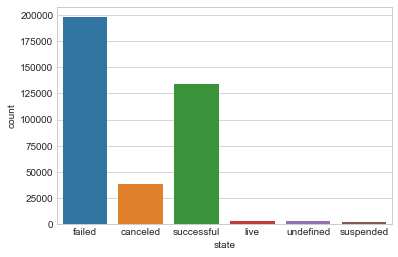

In [8]:
sns.countplot(x='state', data=project)
plt.show()

# Analysis target
* target type: multiple classes
* goal target type: binary classes (to predict projects will successful or not)


In [9]:
# map target values to binary
def mapValues(text):
    if text == 'successful':
        return 'successful'
    else:
        return 'notsuccessful'
    
project['state'] = project['state'].apply(mapValues)

In [10]:
# check target unique values again
project['state'].unique()

array(['notsuccessful', 'successful'], dtype=object)

In [11]:
project['state'].value_counts()

notsuccessful    244705
successful       133956
Name: state, dtype: int64

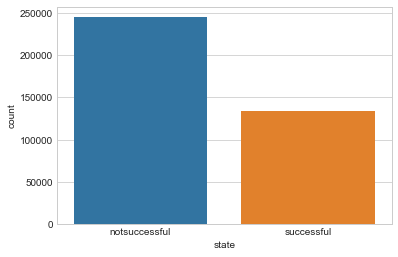

In [12]:
sns.countplot(x='state', data=project)
plt.show()

In [13]:
# Groupby state column
project.groupby('state').mean()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,
notsuccessful,1.075281e+09,70385.125172,1790.959036,18.959028,1305.712816,1607.536433,65118.514983
successful,1.073727e+09,10162.960544,24099.779097,263.921362,17356.034449,22670.795231,9532.853357


### Remove ID and date columns

In [14]:
project = project.drop(['ID','deadline','launched'],axis=1)

# Explore Data More

C:\Users\Ann\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ann\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


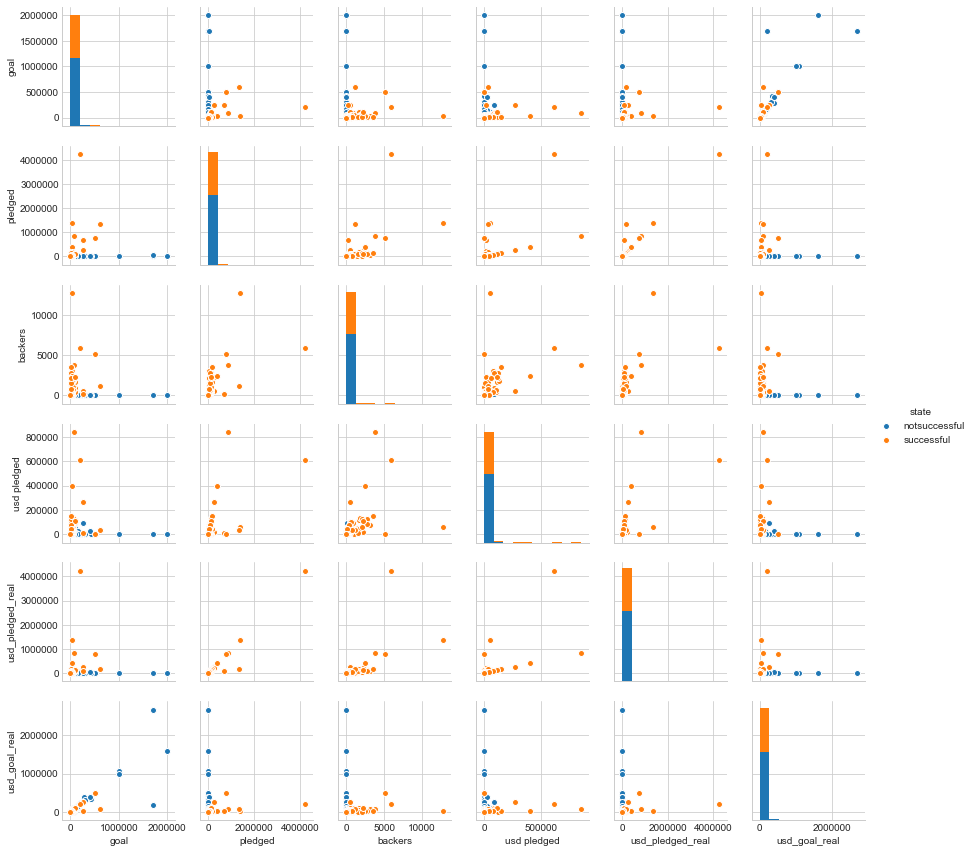

In [15]:
sns.pairplot(project.head(1000),hue='state',size=2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFB9EB6978>,
      dtype=object)

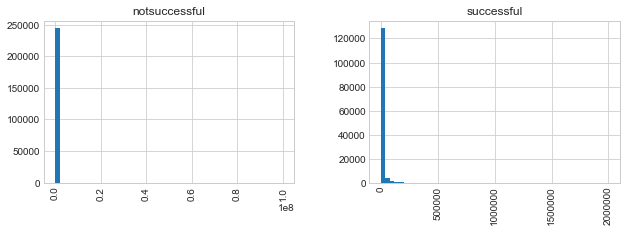

In [16]:
project.hist(column='goal', by='state', bins=50,figsize=(10,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFBAFBADD8>,
      dtype=object)

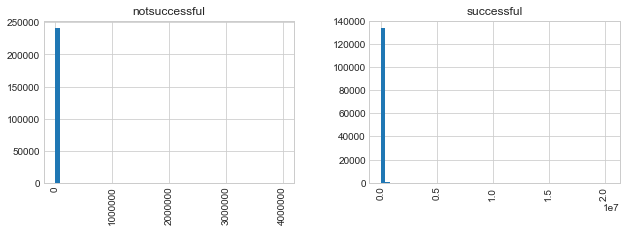

In [17]:
project.hist(column='usd pledged', by='state', bins=50,figsize=(10,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFBAC54898>,
      dtype=object)

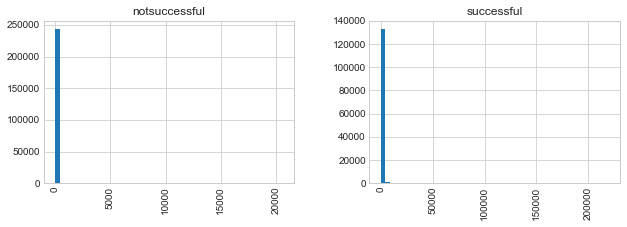

In [18]:
project.hist(column='backers', by='state', bins=50,figsize=(10,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFBA8EE080>,
      dtype=object)

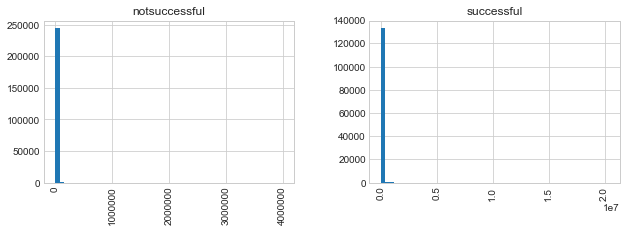

In [19]:
project.hist(column='pledged', by='state', bins=50,figsize=(10,3))

# Implemation
### Remove missing data

In [20]:
# find missing values
col_missing_values = project.columns[project.isnull().any()]
project[col_missing_values].isnull().sum()

name              4
usd pledged    3797
dtype: int64

check if still have null values

In [21]:
project.columns[project.isnull().any()]

Index(['name', 'usd pledged'], dtype='object')

In [22]:
# drop off columns missing values
project = project.dropna()

### Remove Collinear 

In [23]:
# create pearson correlation 
pearson_correlation = project.corr()
pearson_correlation

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
goal,1.000000,0.007327,0.003969,0.005534,0.005072,0.942691
pledged,0.007327,1.000000,0.717858,0.857370,0.952736,0.004992
backers,0.003969,0.717858,1.000000,0.697426,0.753449,0.004476
usd pledged,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,0.005072,0.952736,0.753449,0.907743,1.000000,0.005566
usd_goal_real,0.942691,0.004992,0.004476,0.006172,0.005566,1.000000


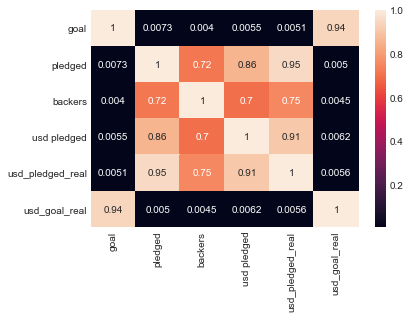

In [24]:
# see correlation in heatmap
sns.heatmap(pearson_correlation,annot=True)

can see usd_pledged_real and pledged have high correlation almost 1

In [25]:
# Select upper triangle 
upper = pearson_correlation.where(np.triu(np.ones(pearson_correlation.shape), k=1).astype(np.bool))
# select the columns have high correlation at  over 0.95
high_correlation = [column for column in upper.columns if any(upper[column] > 0.95)]
high_correlation

['usd_pledged_real']

In [26]:
# drop the high_correlation coloumn
project = project.drop(project[high_correlation], axis=1)

### Convert category variable to dummy

In [27]:
# find category variables
category_var = project.select_dtypes(include=['object']).columns
category_var

Index(['name', 'category', 'main_category', 'currency', 'state', 'country'], dtype='object')

In [28]:
# create dummy for category
categ_list = pd.get_dummies(project['main_category'])
# join to project
project = pd.concat([project,categ_list], axis=1)

# create dummy for country
categ_list = pd.get_dummies(project['country'])
# join to project
project = pd.concat([project,categ_list], axis=1)

# drop category variables
project = project.drop(['category', 'main_category', 'currency','country'],axis=1)

# Modeling

In [29]:
# idenify target and dat
Y = project['state']
x_data = project.drop(['state','name'],axis=1)
X = x_data

In [30]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=5)

C:\Users\Ann\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Logistics Regression

In [31]:
from sklearn.linear_model import LogisticRegression

logis_model = LogisticRegression()
# fit training model
logis_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# For evaluating ML results
from sklearn import metrics

In [108]:
# Prediction
logis_predict_Y = logis_model.predict(X_test)
logis_predict_prob = logis_model.predict_proba(X_test)[:, 1]
logis_predict_prob
Y_test

67496     notsuccessful
310826    notsuccessful
177121    notsuccessful
66670     notsuccessful
297389    notsuccessful
187771    notsuccessful
330555    notsuccessful
345052    notsuccessful
131685    notsuccessful
225642    notsuccessful
293807       successful
335339       successful
58674     notsuccessful
163735       successful
6624      notsuccessful
223038    notsuccessful
21497        successful
141739    notsuccessful
275179       successful
68251     notsuccessful
124844    notsuccessful
255568       successful
74911        successful
29019        successful
162487    notsuccessful
247593    notsuccessful
225194       successful
270690    notsuccessful
330072    notsuccessful
103394       successful
              ...      
364140    notsuccessful
53195     notsuccessful
132075    notsuccessful
5059      notsuccessful
334459    notsuccessful
222718    notsuccessful
198884    notsuccessful
231456    notsuccessful
270778    notsuccessful
8538      notsuccessful
174632    notsuc

## Naives Bayes 

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
bayes_model = GaussianNB()
bayes_model.fit(X_train,Y_train)

GaussianNB(priors=None)

In [101]:
bayes_predict_Y = bayes_model.predict(X_test)
bayes_predict_prob = bayes_model.predict_proba(X_test)[:, 1]

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
decision_model = DecisionTreeClassifier(max_depth=2,random_state=6)

In [39]:
# fit model
decision_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best')

In [102]:
decision_predict_Y = decision_model.predict(X_test)
decision_predict_prob = decision_model.predict_proba(X_test)[:, 1]

# Ramdom Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
randomF_model = RandomForestClassifier(n_estimators=500, max_depth=2,random_state=6)

In [43]:
# fit model
randomF_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [103]:
randonF_predict_Y = randomF_model.predict(X_test)
randonF_predict_prob = randomF_model.predict_proba(X_test)[:, 1]

# Evaluation Calssification 

### Accuracy of Classification

In [45]:
print ('The Accuracy of Model')
print ('Logistics Regression: ',metrics.accuracy_score(Y_test,logis_predict_Y))
print ('Navies Bayes: ',metrics.accuracy_score(Y_test, bayes_predict_Y))
print ('Decision Tree: ',metrics.accuracy_score(Y_test, decision_predict_Y))
print ('Radom Forest: ',metrics.accuracy_score(Y_test, randonF_predict_Y))

The Accuracy of Model
Logistics Regression:  0.9866816944992798
Navies Bayes:  0.5082297391025983
Decision Tree:  0.8337045830443366
Radom Forest:  0.8790615162994184


### Confusion Matrix

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [164]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print ('Logistic Regression Confusion Matrix')
print(confusion_matrix(Y_test,logis_predict_Y))  
print(classification_report(Y_test,logis_predict_Y))  
print(accuracy_score(Y_test,logis_predict_Y))

print ('Naive Bayes Confusion Matrix')
print(confusion_matrix(Y_test,bayes_predict_Y))  
print(classification_report(Y_test,bayes_predict_Y))  
print(accuracy_score(Y_test,bayes_predict_Y)) 

print ('Decision Tree Confusion Matrix')
print(confusion_matrix(Y_test,decision_predict_Y))  
print(classification_report(Y_test,decision_predict_Y))  
print(accuracy_score(Y_test,decision_predict_Y)) 

print ('Random Forest Confusion Matrix')
print(confusion_matrix(Y_test,randonF_predict_Y))  
print(classification_report(Y_test,randonF_predict_Y))  
print(accuracy_score(Y_test,randonF_predict_Y)) 

Logistic Regression Confusion Matrix
[[94783  1726]
 [  271 53164]]
               precision    recall  f1-score   support

notsuccessful       1.00      0.98      0.99     96509
   successful       0.97      0.99      0.98     53435

  avg / total       0.99      0.99      0.99    149944

0.9866816944992798
Naive Bayes Confusion Matrix
[[22771 73738]
 [    0 53435]]
               precision    recall  f1-score   support

notsuccessful       1.00      0.24      0.38     96509
   successful       0.42      1.00      0.59     53435

  avg / total       0.79      0.51      0.46    149944

0.5082297391025983
Decision Tree Confusion Matrix
[[77373 19136]
 [ 5799 47636]]
               precision    recall  f1-score   support

notsuccessful       0.93      0.80      0.86     96509
   successful       0.71      0.89      0.79     53435

  avg / total       0.85      0.83      0.84    149944

0.8337045830443366
Random Forest Confusion Matrix
[[88902  7607]
 [10527 42908]]
               precisi

#  ROC Logistic Regression

In [149]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import ROCAUC

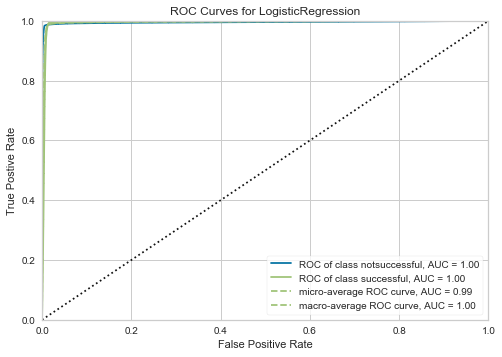

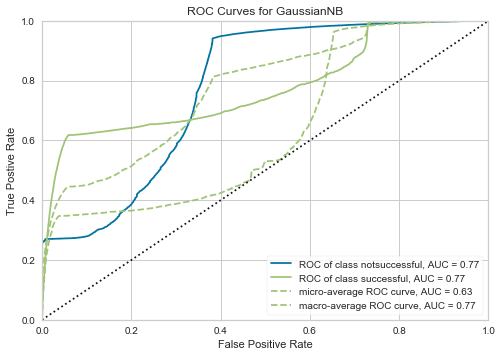

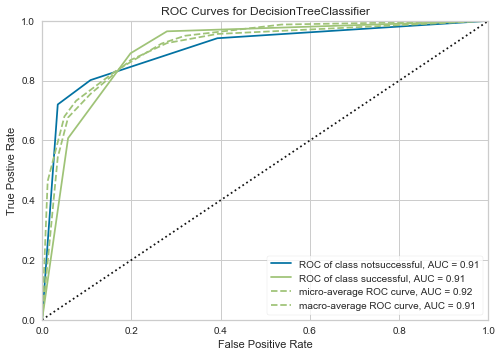

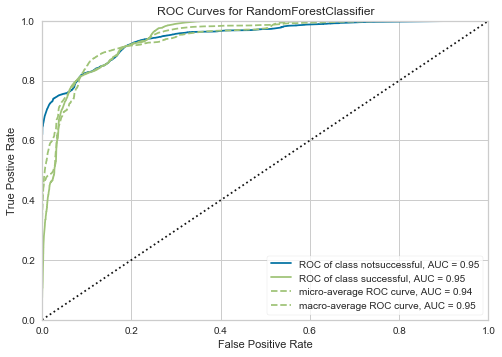

In [162]:
classes = list(set(project['state']))
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logis_model, classes=classes)
visualizer.fit(X_train, Y_train) 
visualizer.score(X_test, Y_test)
g = visualizer.poof() 

visualizer = ROCAUC(bayes_model, classes=classes)
visualizer.fit(X_train, Y_train) 
visualizer.score(X_test, Y_test)
g = visualizer.poof() 

visualizer = ROCAUC(decision_model, classes=classes)
visualizer.fit(X_train, Y_train) 
visualizer.score(X_test, Y_test)
g = visualizer.poof() 

visualizer = ROCAUC(randomF_model, classes=classes)
visualizer.fit(X_train, Y_train) 
visualizer.score(X_test, Y_test)
g = visualizer.poof() 

# Conclusion

1. For this type of classification learning because a predicting a category type with labels
2. Logistic Regression model is achieve the best AUC values: 1 and accuracy: 98.7%. This model performance the best  in predicting and targeing potential outcomes